## Series de Fourier

SymPy  contiene instrucciones para el cálculo simbólico de  series de Fourier de una función $f(x)$ en el intervalo $[-l,l]$.  Para más información se puede consultar: https://docs.sympy.org/latest/modules/series/fourier.html

In [1]:
import sympy
from sympy import *

In [2]:
x = symbols('x')
fourier_series(x**2, (x, -pi, pi))

FourierSeries(x**2, (x, -pi, pi), (pi**2/3, SeqFormula(Piecewise((2*pi**2*sin(_n*pi)/_n + 4*pi*cos(_n*pi)/_n**2 - 4*sin(_n*pi)/_n**3, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (2*pi**3/3, True))*cos(_n*x)/pi, (_n, 1, oo)), SeqFormula(0, (_k, 1, oo))))

In [3]:
fourier_series(x**2, (x, -pi, pi)).truncate(8)

-4*cos(x) + cos(2*x) - 4*cos(3*x)/9 + cos(4*x)/4 - 4*cos(5*x)/25 + cos(6*x)/9 - 4*cos(7*x)/49 + pi**2/3

Construiremos ahora en un mismo gráfico la función original y los primeros $5$ términos de la serie, de esta manera podremos  comparar el resultado de la aproximación. Las opciones para realizar los diferentes gráficos en se pueden consultar en el manual de programa. 

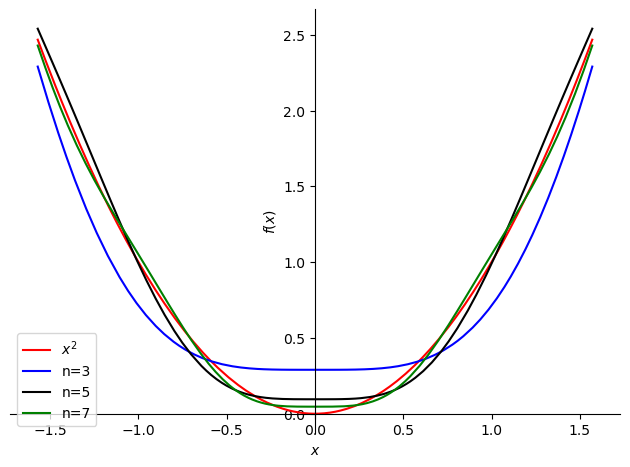

In [4]:
f = x**2
s = fourier_series(f, (x, -pi, pi))
s1 = s.truncate(n = 3)
s2 = s.truncate(n = 5)
s3 = s.truncate(n = 7)
p = plot(f, s1, s2, s3, (x, -pi/2, pi/2), show=False, legend=True)

p[0].line_color = 'r'
p[0].label = '$x^2$'
p[1].line_color = 'b'
p[1].label = 'n=3'
p[2].line_color = 'k'
p[2].label = 'n=5'
p[3].line_color = 'g'
p[3].label = 'n=7'

p.show()

## Mínimos cuadrados

SymPy puede estimar  los parámetros que mejor se ajusten a una función $f=(x,y)$  para un conjunto de datos, utilizando el método de mínimos cuadrados. El programa buscará primero una solución exacta, si no la encuentra buscará una aproximada. El resultado lo presentará como una lista de ecuaciones. 

Vamos a considerar los ejemplos estudiados con anterioridad:

 En el primer ejemplo los datos eran los siguientes:
$$
\left(x,y\right)=  \left(1,2\right),\left(3,2\right)  ,\left(4,5\right),\left(6,6\right)\,.
$$ 

Los datos deben introducirse en forma de matriz.

Supondremos entonces que los puntos se ajustan a un polinomio  lineal del tipo:  $y=mx$. 
El parámetro $m$  se calcula como se muestra a continuación 

In [5]:
# Definir los símbolos
x, y, m, b = symbols('x y m b')

# Definir los datos
data = [(1, 2), (3, 2), (4, 5), (6, 6)]  # Ejemplo de datos

# Construir la matriz X y Y 
X = Matrix([xi for xi, _ in data])
Y = Matrix([yi for _, yi in data])

# Resolver el sistema de ecuaciones normales para encontrar los coeficientes de mínimos cuadrados
coeficiente =  X.solve_least_squares(Y)
# Obtener los valores de los coeficientes
m = N(coeficiente[0],8)
m

1.0322581

Procederemos ahora a graficar los datos experimentales $vs$ el ajuste por mínimos cuadrados en un mismo gráfico. 
Para graficar y trabajar con datos es muy recoemndable utilizar las librerías NumPy (https://numpy.org/)  y Matplotlib (https://matplotlib.org/). Usaremos esas dos librerías como se muestra a continuación

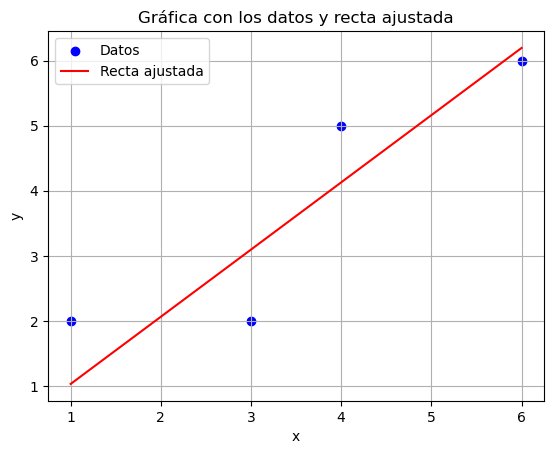

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Obtener la ecuación de la recta ajustada
fitted_line = m*x 
# Graficar los puntos
plt.scatter(X, Y, color='blue', label='Datos')
# Convertir la matriz X de SymPy a un array de NumPy
X_array = np.array(X).astype(float)
# Obtener los valores mínimos y máximos de x
x_min = np.min(X_array)
x_max = np.max(X_array)
# Graficar la recta ajustada
x_values = np.linspace(x_min, x_max, 100)  # Valores de x para la gráfica
plt.plot(x_values, lambdify(x, fitted_line)(x_values), color='red', label='Recta ajustada')
# Configurar la leyenda y etiquetas de los ejes
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica con los datos y recta ajustada')
# Mostrar la gráfica
plt.grid(True)

Nota: Se deja como ejercicio repetir éste mismo  cálculo pero usando un ajuste para  los datos de la forma: $y=ax+b$.

Consideremos el conjunto de datos:

$\left|  {x}_{1}\right> =\left(  1,2,1,1\right)\,,\,\, \left|{x}_{2}\right> =\left(  2,1,1,-1\right) \,,\,\, \left|{y}\right> =\left(  15,12,10,0\right)$. 

Vamos a suponer que ajustan de la manera siguiente: $\left|{y}\right> = a\left|{x}_{1}\right> + b\left|{x}_{2}\right>$.

In [7]:
# Definir los símbolos
a, b = symbols('a b')

# Definir los datos
x1 = Matrix([1, 2, 1, 1])
x2 = Matrix([2, 1, 1, -1])
y =  Matrix([15, 12, 10, 0])

# Construir la matriz del problema
A = Matrix.hstack(x1, x2)

# Construir la matriz de coeficientes y el vector de resultados
ATA = A.T * A
ATy = A.T * y

# Resolver el sistema de ecuaciones normales
coeficientes = ATA.inv() * ATy

# Obtener los valores de los coeficientes
a_valor, b_valor = coeficientes

# Mostrar los valores de los coeficientes
print("Coeficiente a:", N(a_valor,4))
print("Coeficiente b:", N(b_valor,4))


Coeficiente a: 4.091
Coeficiente b: 5.091


Para el tercer ejemplo se consideraron los siguientes datos:
$$
\{(0,1),(1,3),(2,7),(3,15)\} \quad \Leftrightarrow \quad y=a x^2+b x+c .
$$

Haremos el cálculo directo usando un ajuste cuadrático para los datos suministrados.

In [8]:
# Definir los símbolos
x, a, b, c = symbols('x a b c')

# Definir los datos
datos = [(0, 1), (1, 3), (2, 7), (3, 15)]

# Construir la matriz de diseño y el vector de resultados
A = Matrix([[x**2, x, 1] for x, _ in datos])
b = Matrix([y for _, y in datos])

# Resolver el sistema de ecuaciones normales para encontrar los coeficientes de mínimos cuadrados
coeficientes = (A.T * A).inv() * A.T * b

# Obtener los valores de los coeficientes
a_valor, b_valor, c_valor = coeficientes

# Mostrar los valores de los coeficientes
print("Coeficiente a:", a_valor)
print("Coeficiente b:", b_valor)
print("Coeficiente c:", c_valor)


Coeficiente a: 3/2
Coeficiente b: 1/10
Coeficiente c: 11/10


Ahora podemos graficar los datos y la función cuadrática

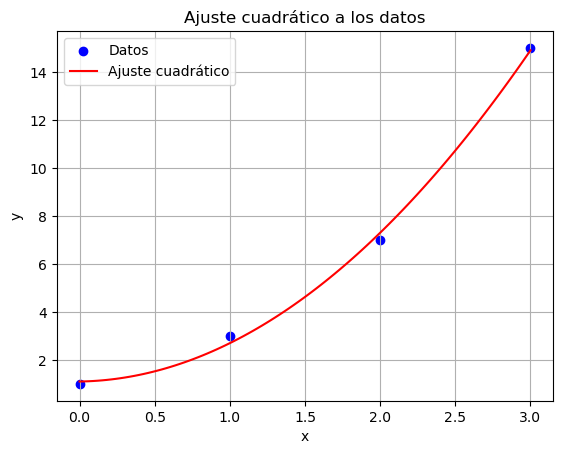

In [9]:
# Convertir los coeficientes a valores numéricos
a_valor_num = float(a_valor)
b_valor_num = float(b_valor)
c_valor_num = float(c_valor)

# Definir la función cuadrática
f_cuadratica = lambda x: a_valor_num * x**2 + b_valor_num * x + c_valor_num

# Crear datos para graficar la función cuadrática
x_values = np.linspace(min([x for x, _ in datos]), max([x for x, _ in datos]), 100)
y_values = [f_cuadratica(x_val) for x_val in x_values]

# Graficar los datos y la función cuadrática
plt.scatter(*zip(*datos), color='blue', label='Datos')
plt.plot(x_values, y_values, color='red', label='Ajuste cuadrático')

# Configurar la leyenda y etiquetas de los ejes
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste cuadrático a los datos')

# Mostrar la gráfica
plt.grid(True)
plt.show()

 SymPy proporciona funcionalidades para trabajar con polinomios ortogonales. Algunos de los polinomios ortogonales más comunes incluyen los polinomios de Legendre, Chebyshev, Hermite y Laguerre.

Así que podemos utilizar SymPy para calcular polinomios ortogonales, evaluarlos en puntos específicos, calcular sus derivadas, integrarlos.

Los primeros 6 polinomios de Legendre se pueden obtener como se muestra a continuación

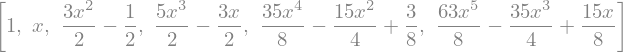

In [10]:
init_printing()
[legendre(n, x) for n in range(6)]

Los diferentes polinomios de Legendre se pueden visualizar de la manera siguiente:

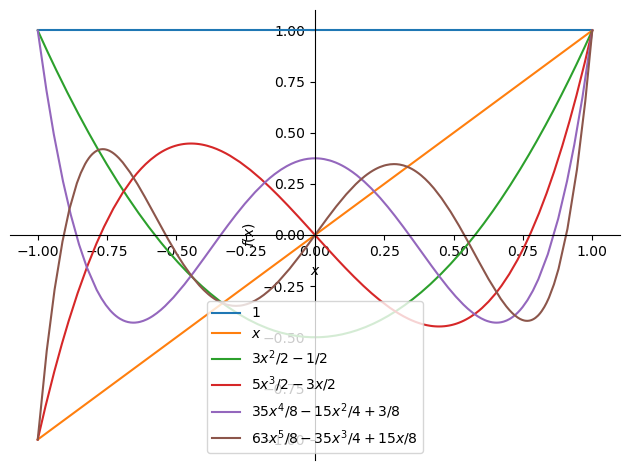

In [11]:
legendre_polynomials = [legendre(n, x) for n in range(6)]
# Graficar los polinomios de Legendre
plot(*legendre_polynomials, (x, -1, 1),legend=true)
plt.show()

Ahora bien, con los datos de la figura \ref{FigPuntExpInterp} planteamos un sistema de ecuaciones lineales que ahora introduciremos en el programa:

In [12]:
C0, C1, C2, C3, C4, C5 = symbols('C0 C1 C2 C3 C4 C5')

ecu1= C0-C1+C2-C3+C4-C5-8
ecu2= C0-S(3)/5*C1+S(1)/25*C2+S(9)/25*C3-S(51)/125*C4+S(477)/3125*C5-10
ecu3= C0-S(1)/5*C1-S(11)/25*C2+S(7)/25*C3+S(29)/125*C4-S(961)/3125*C5-11
ecu4= C0+S(1)/5*C1-S(11)/25*C2-S(7)/25*C3+S(29)/125*C4+S(961)/3125*C5-18
ecu5= C0+S(3)/5*C1+S(1)/25*C2-S(9)/25*C3-S(51)/125*C4-S(477)/3125*C5-20
ecu6= C0+C1+C2+C3+C4+C5-34

In [13]:
soluciones =list(linsolve([ecu1, ecu2, ecu3, ecu4, ecu5, ecu6 ], (C0, C1, C2, C3, C4, C5)))
C0, C1, C2, C3, C4, C5 = soluciones[0]
# Imprimir las soluciones
print("C0 =", C0)
print("C1 =", C1)
print("C2 =", C2)
print("C3 =", C3)
print("C4 =", C4)
print("C5 =", C5)

C0 = 2249/144
C1 = 3043/336
C2 = 1775/504
C3 = -175/216
C4 = 625/336
C5 = 14375/3024


Por lo tanto, la función aproximada será la siguiente:

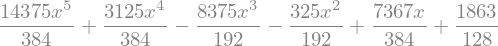

In [14]:
f = C0 + C1*legendre(1,x)+ C2*legendre(2,x) + C3*legendre(3,x)+ C4*legendre(4,x) + C5*legendre(5,x)
f

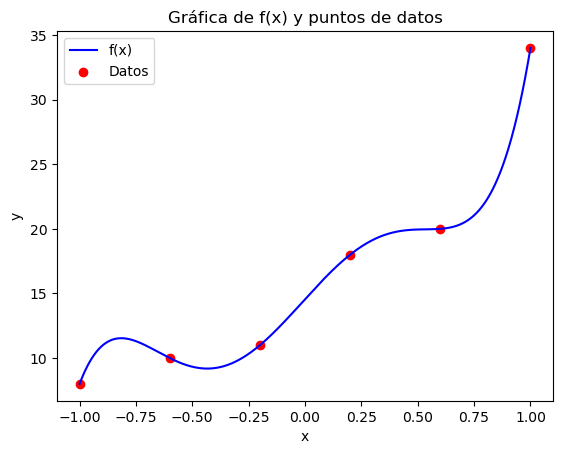

In [15]:
# Crear un conjunto de datos (x_n, y_n)
datos = [(-1,8), (-3/5,10), (-1/5,11), (1/5,18), (3/5,20), (1,34)]
# Convertir los datos en listas de coordenadas x y y
x_datos = np.array([coord[0] for coord in datos])
y_datos = np.array([coord[1] for coord in datos])
# Convertir la función simbólica en una función NumPy
f_num = lambdify(x, f, 'numpy')
# Crear una serie de puntos entre los puntos de datos para evaluar la función suavizada
x_interp = np.linspace(min(x_datos), max(x_datos), 1000)
y_interp = f_num(x_interp)
# Graficar la función f(x) y los puntos de datos
plt.plot(x_interp, y_interp, color='blue', label='f(x)')
plt.scatter(x_datos, y_datos, color='red', label='Datos')
# Configurar leyendas y etiquetas de ejes
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de f(x) y puntos de datos')
# Mostrar la gráfica
plt.show()